In [23]:
import pandas as pd
import re
import json

file_path = '/tmp/evallogs/230420223349T7HMV25N_gpt-3.5-turbo_csv-rccount-cell-generate.jsonl'

data = []
samples = {}

with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines[1:-1]:  # Skip the first two lines and the last line
        if "{\"final_report\":" not in line:
            event = json.loads(line)
            event_type = event['type']
            sample_id = event['sample_id']

            if event_type == 'sampling':
                content = ''
                for item in event['data']['prompt']:
                    if item['role'] == 'user':
                        content = item['content']
                        break

                # Extract number of rows and columns from content
                rows, columns = map(int, re.findall(r'\d+', content))

                samples[sample_id] = {
                    'row_count': rows,
                    'col_count': columns
                }

            elif event_type == 'match':
                if sample_id in samples:
                    data.append({
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        'sample_id': sample_id,
                        'row_count': samples[sample_id]['row_count'],
                        'col_count': samples[sample_id]['col_count'],
                        'format_match': event['data']['format_match'],
                        'row_count_match': event['data']['row_count_match'],
                        'col_count_match': event['data']['col_count_match'],
                        'cell_data_match': event['data']['cell_data_match']
                    })

df = pd.DataFrame(data)
print(df)


                               sample_id  row_count  col_count  format_match  \
0      csv-rccount-cell-generate.dev.484          4          2          True   
1     csv-rccount-cell-generate.dev.1809          6          3          True   
2     csv-rccount-cell-generate.dev.1215          2         14          True   
3     csv-rccount-cell-generate.dev.1501          5          6          True   
4     csv-rccount-cell-generate.dev.1326         12          5          True   
...                                  ...        ...        ...           ...   
3194  csv-rccount-cell-generate.dev.1925         14         13          True   
3195  csv-rccount-cell-generate.dev.1401         14         12          True   
3196  csv-rccount-cell-generate.dev.1453         13         15          True   
3197   csv-rccount-cell-generate.dev.639         15         15          True   
3198    csv-rccount-cell-generate.dev.86         13         12          True   

      row_count_match  col_count_match 

In [24]:
# Assuming your DataFrame is named df
grouped = df.groupby(['row_count', 'col_count']).mean().reset_index()

# Rename the columns for better readability
grouped.columns = [
    'row_count',
    'col_count',
    'format_match_pct',
    'row_count_match_pct',
    'col_count_match_pct',
    'cell_data_match_pct'
]

# Convert the percentages to a more human-readable format (0-100%)
grouped[['format_match_pct', 'row_count_match_pct', 'col_count_match_pct', 'cell_data_match_pct']] *= 100

print(grouped)

     row_count  col_count  format_match_pct  row_count_match_pct  \
0            2          2             100.0           100.000000   
1            2          3             100.0           100.000000   
2            2          4             100.0           100.000000   
3            2          5             100.0           100.000000   
4            2          6             100.0           100.000000   
..         ...        ...               ...                  ...   
175         15         11             100.0            31.250000   
176         15         12             100.0            35.757576   
177         15         13             100.0            22.549020   
178         15         14             100.0            11.594203   
179         15         15             100.0            12.368973   

     col_count_match_pct  cell_data_match_pct  
0             100.000000           100.000000  
1             100.000000           100.000000  
2             100.000000           100.

/tmp/ipykernel_11990/781893069.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['row_count', 'col_count']).mean().reset_index()


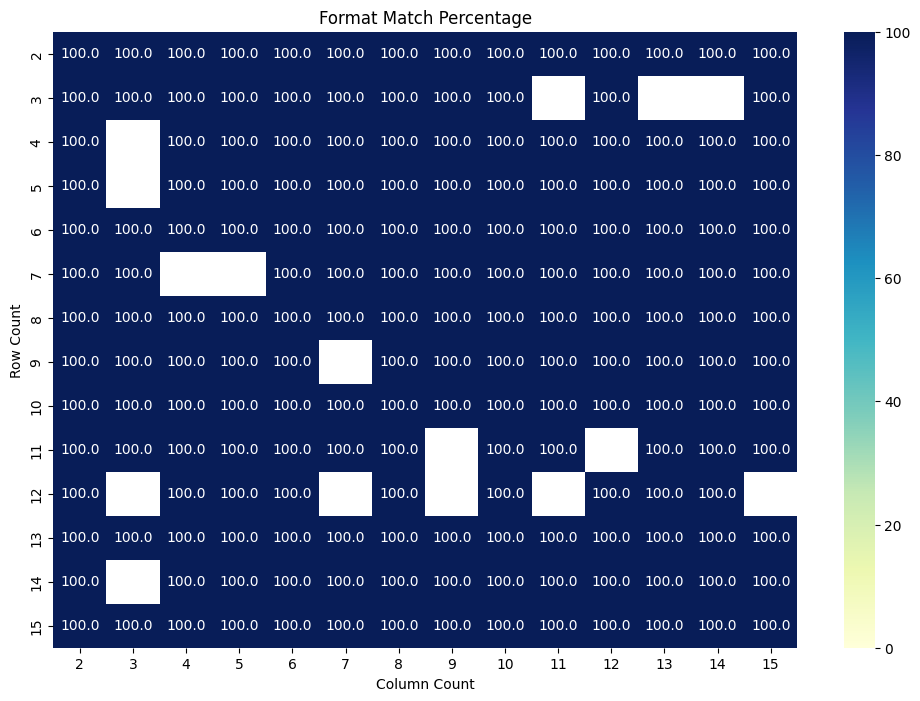

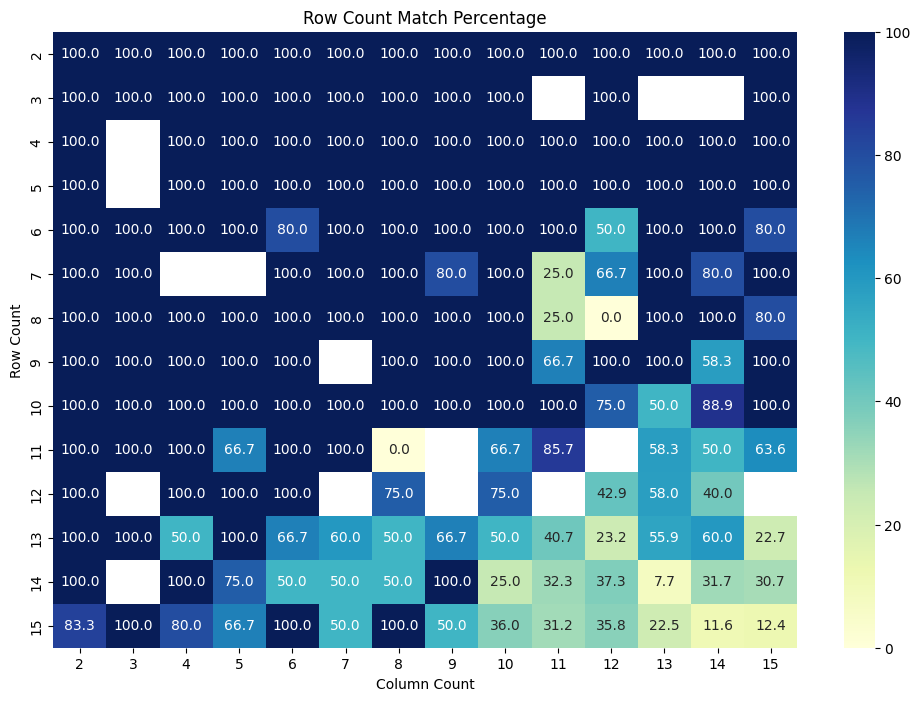

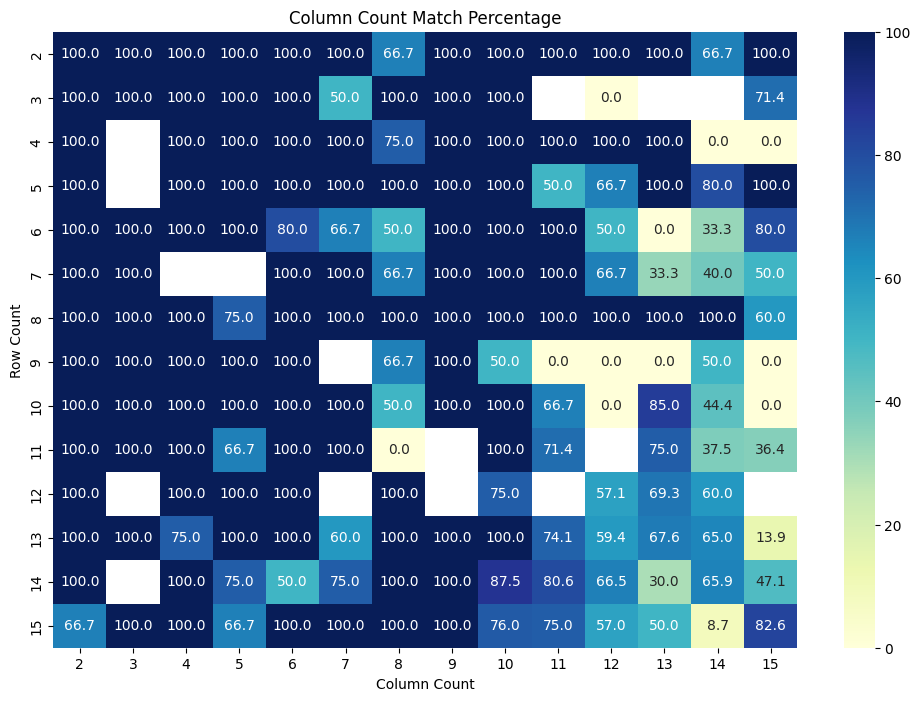

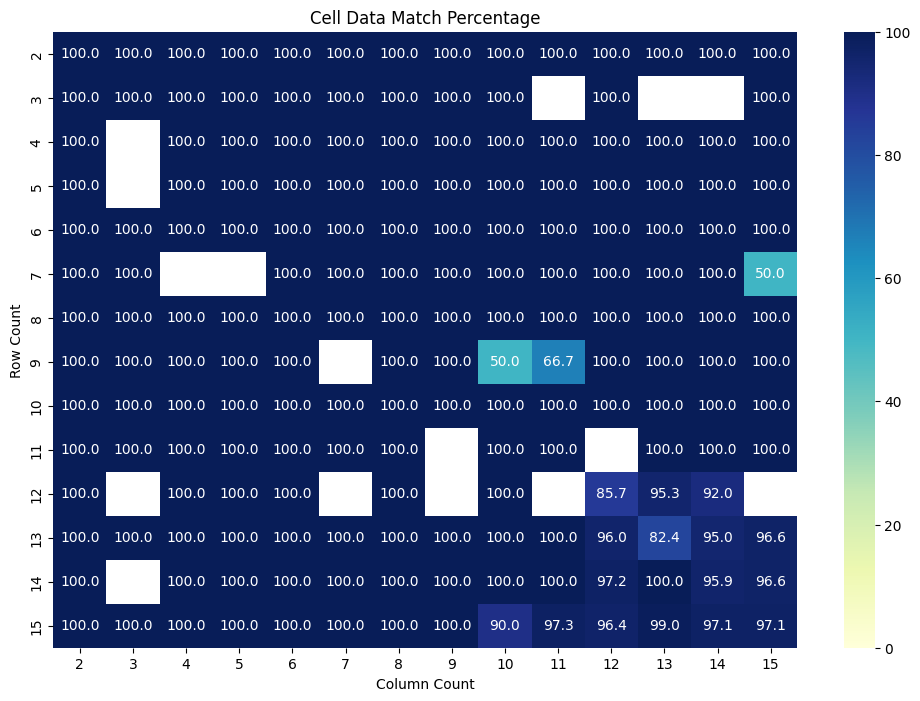

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(data, value_column, title, xlabel='Column Count', ylabel='Row Count'):
    heatmap_data = data.pivot(index='row_count', columns='col_count', values=value_column)
    plt.figure(figsize=(12, 8))  # Adjust the numbers to change the width and height of the image
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", vmin=0, vmax=100)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


# Create a heatmap for each percentage column
create_heatmap(grouped, 'format_match_pct', 'Format Match Percentage')
create_heatmap(grouped, 'row_count_match_pct', 'Row Count Match Percentage')
create_heatmap(grouped, 'col_count_match_pct', 'Column Count Match Percentage')
create_heatmap(grouped, 'cell_data_match_pct', 'Cell Data Match Percentage')
